# COMPUTATIONAL HW 1

### MADE BY: CHENGHENG LI CHEN

Execute this cell to install all the requirements.

In [ ]:
!pip install matplotlib
!pip install numpy
!pip install scipy

Libraries to use:

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint, solve_ivp

# PROBLEM 1

Consider the first order autonomous differential equation

$$
y' = -2 + 5y^2 - y^5.
$$

(a) Plot the right side of the equation,

$$
f(y)=-2 + 5y^2 - y^5,
$$
on the interval $-2 \leq y \leq 2$ (with $y$ on horizontal axis).

Graphically determine how many roots $f$ has and their approximate values.

In [4]:
def f(y):
    return -2 + 5 * y**2 - y**5

In [5]:
y = np.linspace(-2, 2, 100000)
z = f(y)

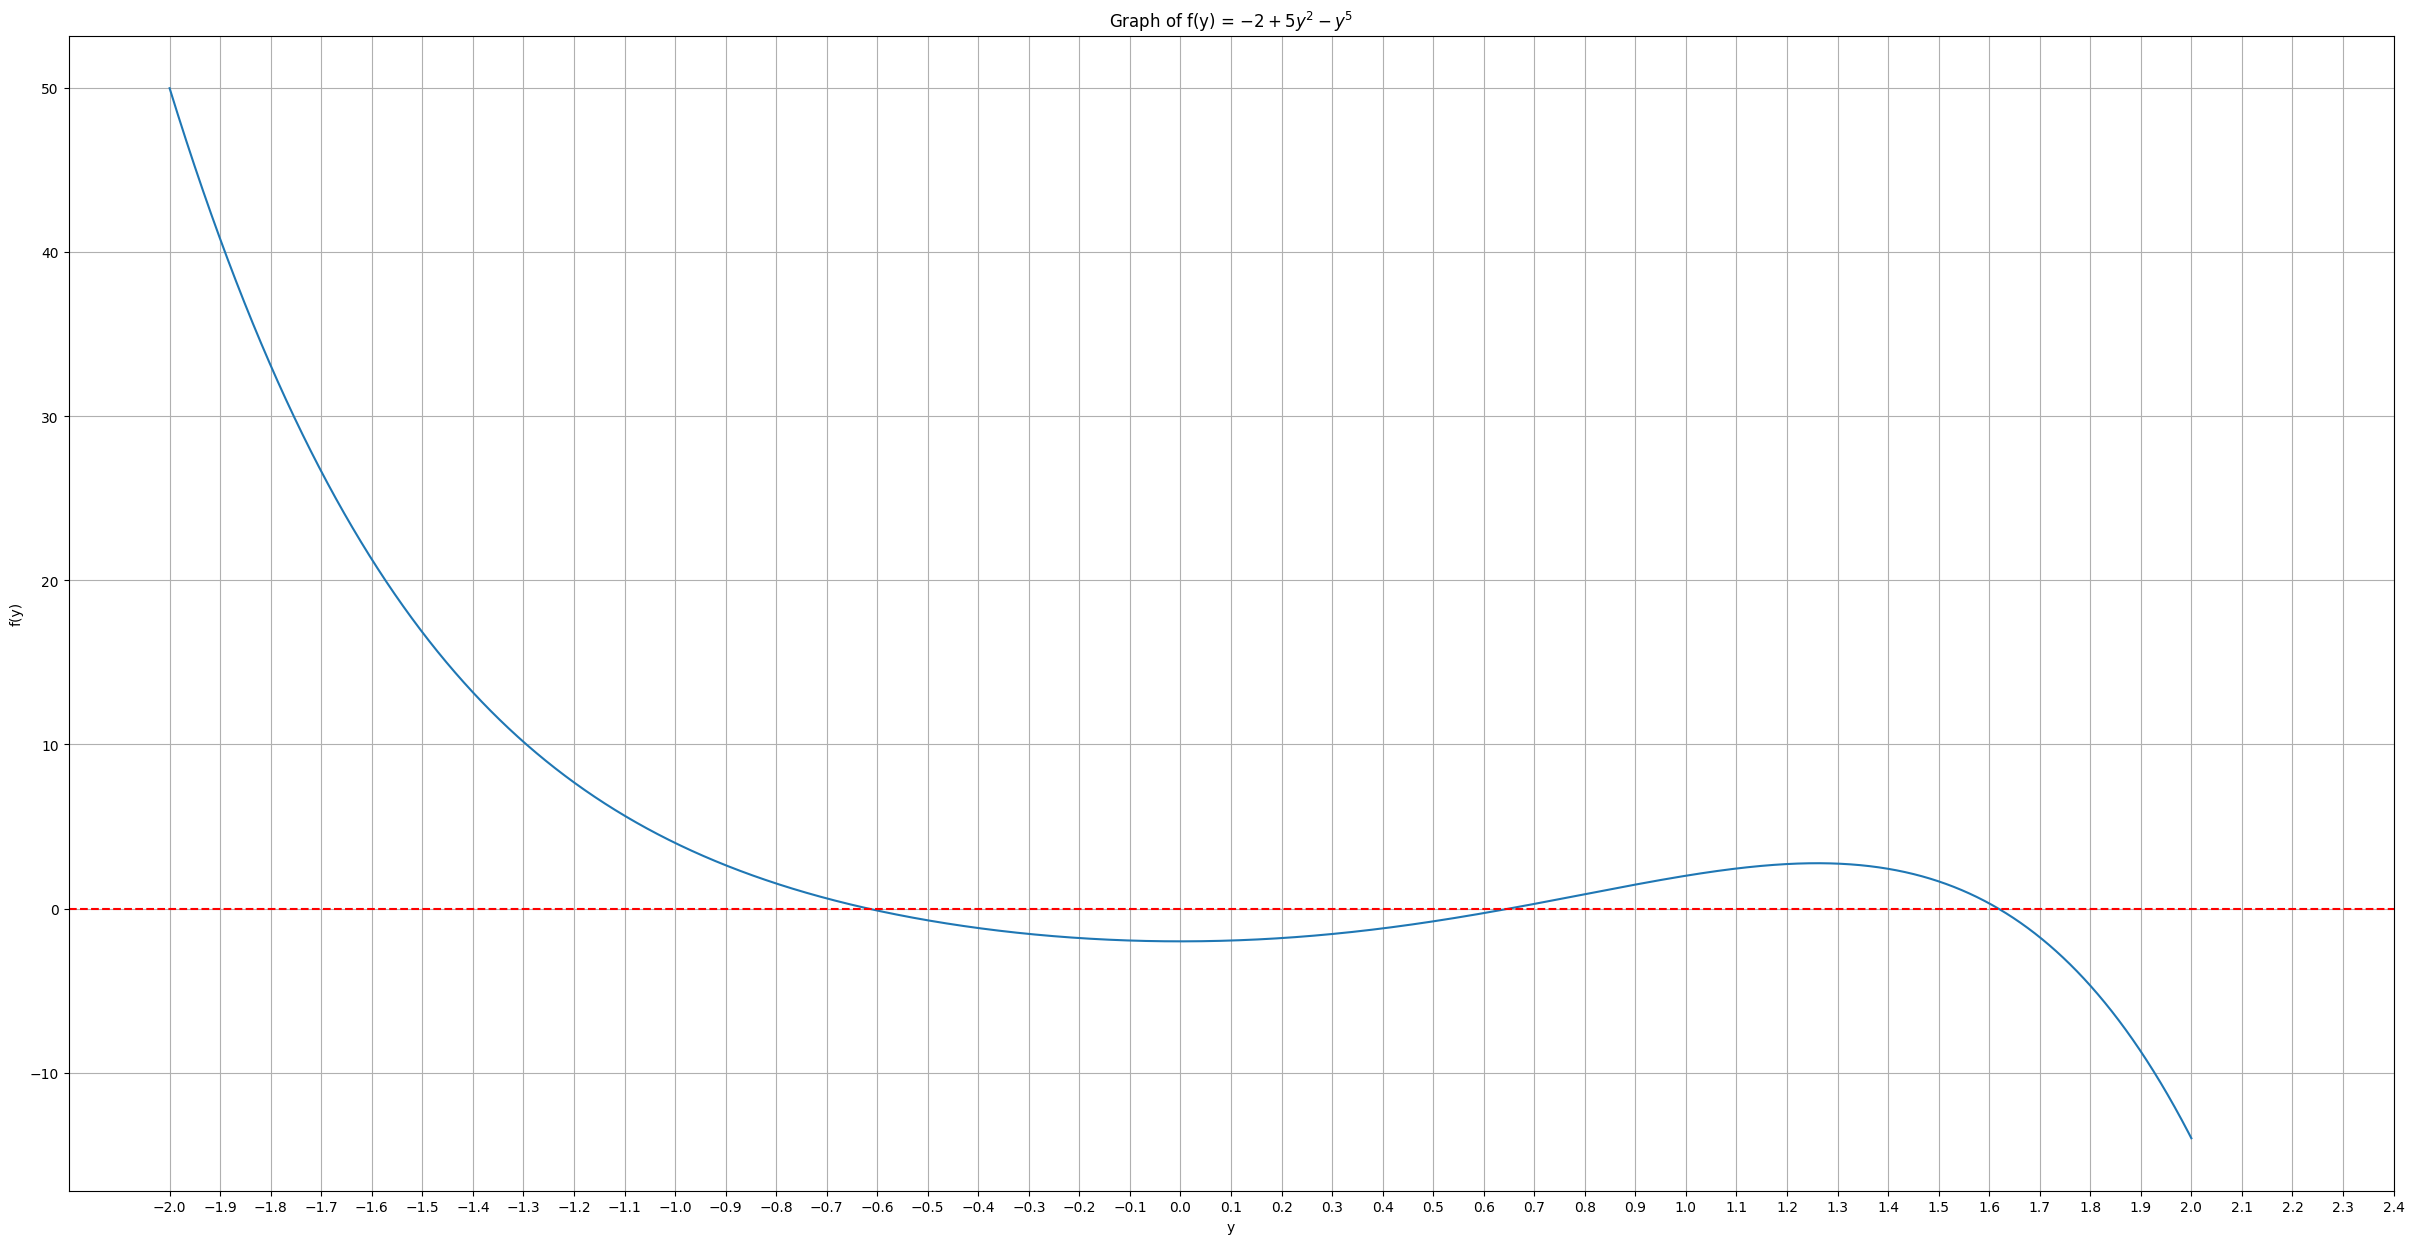

In [6]:
plt.figure(figsize=(30, 15))
plt.plot(y, z)


plt.xlabel('y')
plt.ylabel('f(y)')
plt.title('Graph of f(y) = $-2 + 5y^2 - y^5$')

plt.axhline(0, color='r', linestyle='--', label='y = 0')  # horizontal line for reference
plt.xticks(np.arange(-2, 2.5, 0.1))
plt.grid(True)
plt.show()

We can see in the graph that there are 3 roots since the graph intersects 3 times in with the x axes on the interval given.

We can see aproximately the value of the root in the graph which are:

$y_1 = -0.6$

$y_2 = 0.65$

$y_3 = 1.63$

(b) Plot a direction field and the solutions to the ODE for each of three initial conditions: $y(0) = 0, y(0) = 1$ and $y(0) = 2$.

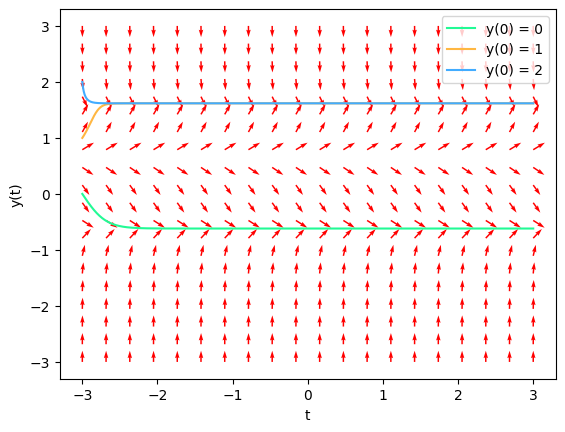

In [7]:
def ode(y, t):
    return -2 + 5 * y**2 - y**5


# Define graph boundaries
max_value = 3
min_value = -max_value

# Plotting solutions
t = np.linspace(min_value, max_value, 1000)

# For each innitail solution plot the solution
y0_values = [0, 1, 2]
colors = ['#22FA95', '#FFB742', '#42ACFF']
for index, y0 in enumerate(y0_values):
    y = odeint(ode, y0, t)
    plt.plot(t, y, color = colors[index] ,label=f"y(0) = {y0}")


# Plotting direction field
# Create the values to plot the direction fields
x = np.linspace(min_value, max_value, 20)  
y = np.linspace(min_value, max_value, 20)  

# Create a grid of (x, y) values
X, Y = np.meshgrid(x, y)

# Calculate the direction at each point on the grid
U = 1  
V = ode(Y, X)

# Normalize the vectors
N = np.sqrt(U**2 + V**2)
U /= N
V /= N

# Plot the direction field
plt.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=5, color='red')

plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.show()

(c) Let $y(t)$ the solution satisfying one of the initial conditions above. Determine the limit

$$
\lim_{t \to \infty} y(t)
$$


for each initial condition.

In the previous graph we can see that the solutions are converging to a number. However, we wanna check this value as the las value computed when t gets larger.

In [8]:
# Define graph boundaries
max_value = 100000

# Plotting solutions
t = np.linspace(0, max_value, 100000)

# For each innitail solution plot the solution
y0_values = [0, 1, 2]
colors = ['#22FA95', '#FFB742', '#42ACFF']
for index, y0 in enumerate(y0_values):
    y = odeint(ode, y0, t)
    print(f'The limit with the initial value y(0) = {y0} is {y[-1][0]}')

The limit with the initial value y(0) = 0 is -0.6180339887498948
The limit with the initial value y(0) = 1 is 1.618033988749895
The limit with the initial value y(0) = 2 is 1.6180339887498951


Therefore, we can conclude that:

With $y(0) = 0$:
$$
\lim_{t \to \infty} y(t) = -0.618
$$

With $y(0) = 1$:

$$
\lim_{t \to \infty} y(t) = 1.618
$$

With $y(0) = 2$
$$
\lim_{t \to \infty} y(t) = 1.618
$$

# PROBLEM 2

Suppose that a population $y(t)$ satisfies the initial value problem

$$
\frac{dy}{dt} = r(t) - k, y(0) = y_0
$$
where the growth rate $r(t)$ given by

$$
r(t) = \frac{1}{5} (1+sint(t))
$$

and $k$ is a constant (called the rate of predation)

(a) Let $k = 0.2$ Use a numeric ode solver to find an approximation of $y(t)$ the interval $0 \leq t \leq 30$ for each of the initial conditions
$$y(0) = 0.81, 0.82, 0.83, 0.84, 0.85$$

Plot the results in the same figure and include a legend and title.

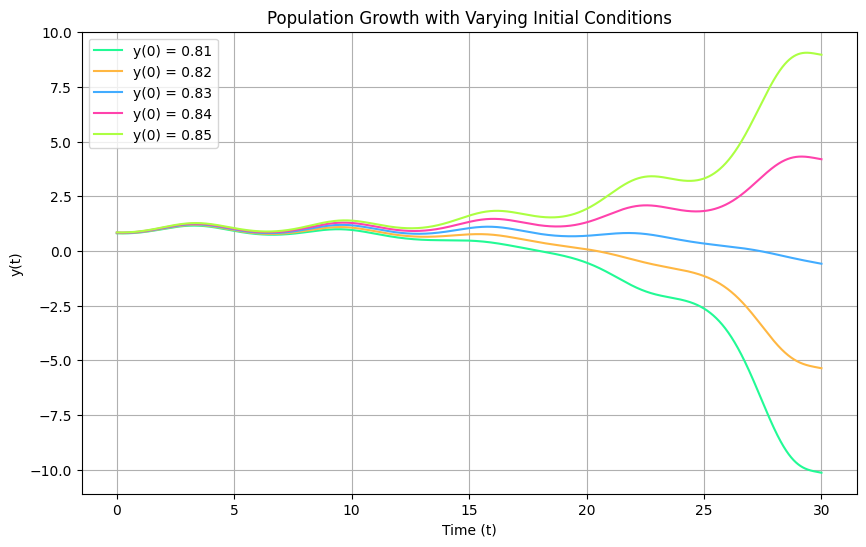

In [43]:
# Define r(t)
def r(t):
    return 1/5*(1+ np.sin(t))

# Define k
k = 0.2

#Define ODE
def ode(y, t):
    return r(t)*y - k

# Define graph boundaries
max_value = 30
min_value = 0


# Plotting solutions
t = np.linspace(min_value, max_value, 100000)


# Create the figure plot 
plt.figure(figsize=(10, 6))


# For each innitail solution plot the solution
y0_values = [0.81, 0.82, 0.83, 0.84, 0.85]
colors = ['#22FA95', '#FFB742', '#42ACFF', '#FF42AC', '#ACFF42', '#FF42AC']
for index, y0 in enumerate(y0_values):
    y = odeint(ode, y0, t)
    plt.plot(t, y, color = colors[index] ,label=f"y(0) = {y0}")

# Add labels, legend, and title
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.legend()
plt.title('Population Growth with Varying Initial Conditions')

# Display the plot
plt.grid(True)
plt.show()


(b) Estimate (to 2 decimal places) the critical initial population $y_c$ below which the population will become extinct. In other words, find the smallest initial value $y(0)$ such that the corresponding solution $y(t)$ never reaches $0$.



In the previous graph that with the initials values below or equal to $0.83$, $y(t)$ reaches $0$ in a certain $t$. Therefore, we can see that with the initial value of $0.84$ or larger the function $y(t)$ does not reach $0$ in any $t$. We can check this with the following code.

In [49]:
# Define graph boundaries
max_value = 1000
min_value = 0


# Plotting solutions
t = np.linspace(min_value, max_value, 100000)


# For each innitail solution plot the solution
y0_values = [0.81, 0.82, 0.83, 0.84, 0.85]
T_values = dict()
colors = ['#22FA95', '#FFB742', '#42ACFF', '#FF42AC', '#ACFF42', '#FF42AC']
for index, y0 in enumerate(y0_values):
    y = odeint(ode, y0, t)
    T_values[y0] = min(y)
    
for y0 in T_values:
    if(T_values[y0] > 0):
        print(f'The population will never die out for y(0) = {y0}')
        break


The population will never die out for y(0) = 0.84


So, if $y_c$ is below $0.84$ the population will become extinct.

# PROBLEM 3

Euler’s method approximates the solution to the initial value problem:

$$
y' = f(t,y)
$$
$$
y(t_0) = y_0
$$
with a step size h at the points $t_n = t_0 + nh$ h by the incremental update

$$
y_{n+1} = y_n + hf(t_n, y_n)
$$

This way, $y_n$ approximates the solution $y$ at time $t_n$.
Consider the initial value problem

$$
y' =  ty - y, y(0) = 0.5
$$

Implement Euler’s method with each step size, $h = 0.2, 0.1, 0.05$, for $0 \leq t \leq 1$ and plot the results in a single figure. Solve the ODE (by hand) and plot the exact solution in the same figure. Include a title and a legend.

We can solve the ODE by hand with the integral factor method.

$$
y' = y(t-1)
$$

$$
y' - y(t-1) = 0
$$

We can obteain the integrate factor by:
$$
I(t) = e^{  - \int (1-t) \,dt  } = e^{   \int (1-t) \,dt  } = e^{  t - \frac{t^2}{2}  + C}
$$

We can solve the ODE using $I(t)$:
$$
e^{  t - \frac{t^2}{2}  +C} y = 0
$$

$$
y = e^{ \frac{t^2}{2} - t}e^{c} \Rightarrow y = D e^{ \frac{t^2}{2} - t}

$$
With the innitial value, we can compute D:

$$
0.5 = D e^{ \frac{0^2}{2} - 0} \Rightarrow D = 0.5
$$

Therefore, the exact solution to the inital value problem is:

$$
y = 0.5 e^{ \frac{t^2}{2} - t}
$$
$$


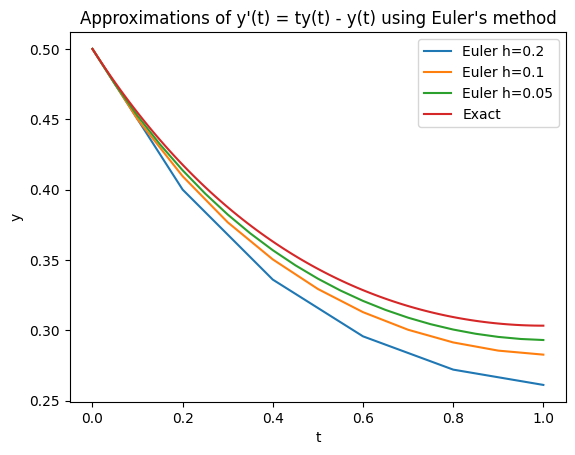

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(t,y) = ty - y
def f(t,y):
    return t*y - y

# Define the exact solution y(t) = 0.5e^(t^2/2)
def y_exact(t):
    return 0.5*np.exp(t**2/2 - t)

# Set the initial condition y(0) = 0.5
y0 = 0.5

# Set the step sizes
h1 = 0.2
h2 = 0.1
h3 = 0.05

# Compute the approximations using Euler's method
t1 = np.arange(0,1+h1,h1)
y1 = np.zeros_like(t1)
y1[0] = y0
for n in range(len(t1)-1):
    y1[n+1] = y1[n] + h1*f(t1[n],y1[n])

t2 = np.arange(0,1+h2,h2)
y2 = np.zeros_like(t2)
y2[0] = y0
for n in range(len(t2)-1):
    y2[n+1] = y2[n] + h2*f(t2[n],y2[n])


t3 = np.arange(0,1+h3,h3)
y3 = np.zeros_like(t3)
y3[0] = y0
for n in range(len(t3)-1):
    y3[n+1] = y3[n] + h3*f(t3[n],y3[n])

# Plot the results
plt.plot(t1, y1, label='Euler h=0.2')
plt.plot(t2, y2, label='Euler h=0.1')
plt.plot(t3, y3, label='Euler h=0.05')
t = np.linspace(0,1,100)
plt.plot(t, y_exact(t), label='Exact')
plt.title("Approximations of y'(t) = ty(t) - y(t) using Euler's method")
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()